In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import ticker
%matplotlib inline

In [2]:
df1 = pd.read_csv('../passing.csv', index_col='Rk')
df2 = pd.read_csv('../possession.csv', index_col='Rk')

In [3]:
df_pos = pd.read_excel('../Player Positions-FBRef format.xlsx')

In [4]:
df_pass = pd.merge(df1, df_pos, on="Player")
df_carry = pd.merge(df2, df_pos, on="Player")

In [5]:
pos = ['Central Midfield', 'Defensive Midfield']

# FILTERING ONLY CMS AND DMS
df_pass = df_pass[df_pass['Position'].apply(lambda x: x in pos)]
df_carry = df_carry[df_carry['Position'].apply(lambda x: x in pos)]

In [6]:
# FILTERING BY 90s and AGE
df_pass = df_pass[(df_pass['90s']>=10) & (df_pass['Age']<=23)]
df_carry = df_carry[(df_carry['90s']>=10) & (df_carry['Age']<=23)]

In [7]:
df_pass = df_pass.drop_duplicates()
df_carry = df_carry.drop_duplicates()

In [8]:
text_color = 'black'
mpl.rcParams['font.weight']='bold'
mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['text.color']=text_color
mpl.rcParams['font.family']='Calibri'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

from adjustText import adjust_text
from highlight_text import ax_text,fig_text

In [9]:
df_pass['Prog%'] = df_pass['Prog']*100/df_pass['Cmp']
df_carry['Prog%'] = df_carry['Prog']*100/df_carry['Carries']

In [10]:
players = ['Manuel Locatelli', 'Nicolò Barella', 'Youri Tielemans', 'Florian Neuhaus', 'Frenkie de Jong',
          'Maximilian Eggestein', 'Aurélien Tchouaméni', 'Rodrigo Bentancur', 'Bruno Guimarães', 'Eduardo Camavinga',
          'Franck Kessié', 'Houssem Aouar', 'Declan Rice', 'Dani Ceballos', 'Maxence Caqueret', 'Boubakary Soumaré',
          'Edu Expósito', 'Rúben Neves', 'Angelo Fulgini','Tanguy Ndombele', 'Sander Berge', 'Federico Valverde',
          'Boubacar Kamara', 'Carlos Soler', 'Gaetano Castrovilli', 'Wilfred Ndidi', 'Carles Aleñá', 'Curtis Jones',
          'Scott McTominay']

In [11]:
df_filter = pd.DataFrame(data={'Player':df_pass[df_pass['Player'].apply(lambda x: x in players)]['Player'],
                               'PassProg%':df_pass[df_pass['Player'].apply(lambda x: x in players)]['Prog%'],
                               'CarryProg%':df_carry[df_carry['Player'].apply(lambda x: x in players)]['Prog%']
})


In [12]:
df_player = pd.DataFrame(data={'Player': df_pass['Player'],
                              'PassProg%': df_pass['Prog%'],
                              'CarryProg%': df_carry['Prog%']})


Text(0.152, 0.857, 'khatri_shreyas')

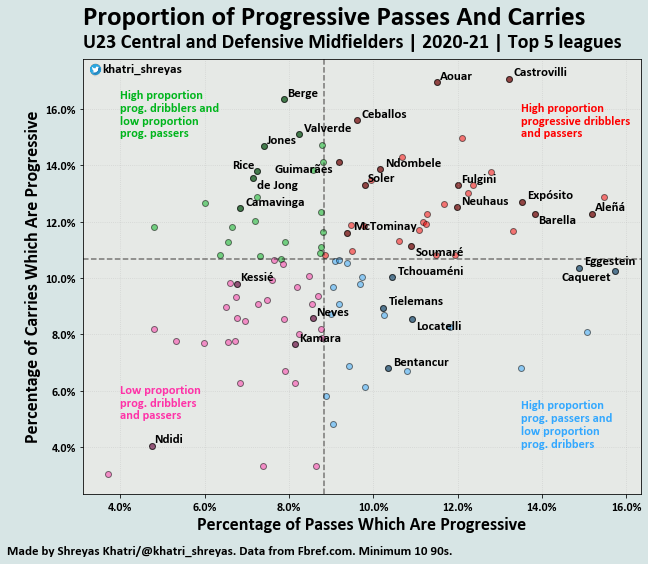

In [13]:
fig, ax = plt.subplots(figsize=(10,8))
fig.set_facecolor('#D7E5E5')
ax.patch.set_facecolor('#E6E9E6')
ax.grid(True, ls=':', alpha=0.4)

med_pass = df_pass['Prog%'].quantile(0.5)
med_carry = df_carry['Prog%'].quantile(0.5)
ax.axvline(med_pass, ls='--', c='#2D2828', alpha=0.6)
ax.axhline(med_carry, ls='--', c='#2D2828', alpha=0.6)

# UPPER RIGHT QUADRANT
df_temp = df_player[(df_player['PassProg%']>med_pass) & (df_player['CarryProg%']>med_carry)]
x, y = df_temp['PassProg%'], df_temp['CarryProg%']
ax.scatter(x, y, c='red', alpha = 0.5, edgecolor='black')
ax.text(13.5,15,'High proportion\nprogressive dribblers\nand passers', c='red', size=12.5)

# UPPER LEFT QUADRANT
df_temp = df_player[(df_player['PassProg%']<=med_pass) & (df_player['CarryProg%']>med_carry)]
x, y = df_temp['PassProg%'], df_temp['CarryProg%']
ax.scatter(x, y, c='#00B51C', alpha = 0.5, edgecolor='black')
ax.text(4,15,'High proportion\nprog. dribblers and\nlow proportion\nprog. passers', c='#00B51C', size=12.5)

# LOWER RIGHT QUADRANT
df_temp = df_player[(df_player['PassProg%']>med_pass) & (df_player['CarryProg%']<=med_carry)]
x, y = df_temp['PassProg%'], df_temp['CarryProg%']
ax.scatter(x, y, c='#33A8FF', alpha = 0.5, edgecolor='black')
ax.text(13.5,4,'High proportion\nprog. passers and\nlow proportion\nprog. dribbers', c='#33A8FF', size=12.5)

# LOWER LEFT QUADRANT
df_temp = df_player[(df_player['PassProg%']<=med_pass) & (df_player['CarryProg%']<=med_carry)]
x, y = df_temp['PassProg%'], df_temp['CarryProg%']
ax.scatter(x, y, c='#FF33A8', alpha = 0.5, edgecolor='black')
ax.text(4,5,'Low proportion\nprog. dribblers\nand passers', c='#FF33A8', size=12.5)

texts = []
for x, y, s in zip(df_filter['PassProg%'], df_filter['CarryProg%'], df_filter['Player']):
    if len(s.split())==1:
        name = s
    else:
        name = ' '.join(s.split()[1:])
    ax.scatter(x, y, c='black', alpha = 0.4)
    texts.append(ax.text(x, y, name, fontdict=dict(color='black', size=13)))
    
adjust_text(texts,force_points=0.2, force_text=0.2,
            expand_points=(1.2, 1.2), expand_text=(1, 1),
            arrowprops=dict(arrowstyle = '-', lw=0.1, alpha = 0))


ax.xaxis.set_major_formatter(ticker.PercentFormatter())
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# TITLES AND LABELS
fig.text(0.125,0.94,'Proportion of Progressive Passes And Carries', size = 27, weight='heavy')
fig.text(0.125,0.90,'U23 Central and Defensive Midfielders'+' | 2020-21 | Top 5 leagues', size = 20)
ax.set_xlabel('Percentage of Passes Which Are Progressive', size=18, weight='bold')
ax.set_ylabel('Percentage of Carries Which Are Progressive', size=18, weight='bold')

fig.text(0.02,0.02,'Made by Shreyas Khatri/@khatri_shreyas. Data from Fbref.com. Minimum 10 90s.', size=13)

# TWITTER
ax2 = fig.add_axes([0.13,0.85,0.025,0.025])
ax2.axis('off')
img = plt.imread('twitter.png')
ax2.imshow(img)
fig.text(0.152,0.857,'khatri_shreyas', size=13, weight='bold')

#plt.savefig('Prog', facecolor='#D7E5E5', dpi=300)